In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Use wget to get the zipfile to work on this notebook
!wget -O student.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
!unzip student.zip -d student_data
df = pd.read_csv("student_data/student-mat.csv", sep=";")
df.head()

--2024-10-31 02:29:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘student.zip’

student.zip             [ <=>                ]  20.00K  --.-KB/s    in 0.07s   

2024-10-31 02:29:07 (299 KB/s) - ‘student.zip’ saved [20478]

Archive:  student.zip
  inflating: student_data/student-mat.csv  
  inflating: student_data/student-por.csv  
  inflating: student_data/student-merge.R  
  inflating: student_data/student.txt  


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

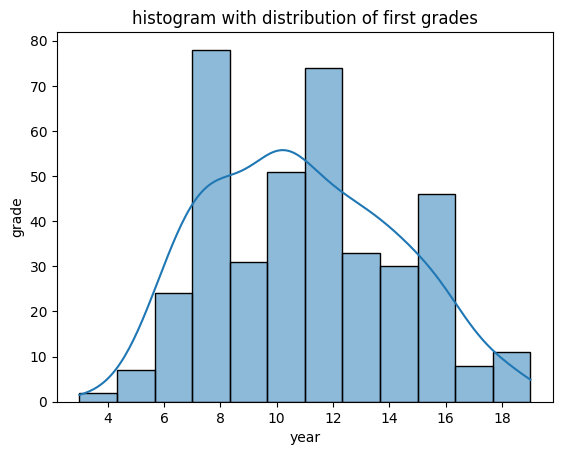

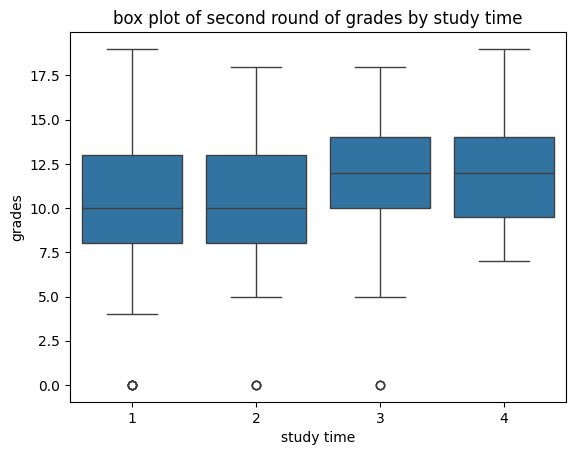

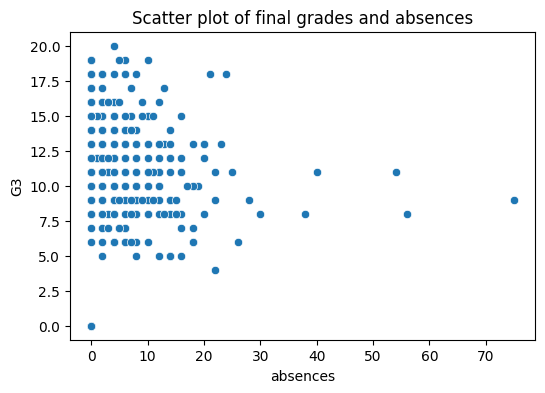

In [9]:
#Here we get a bunch of summary statistics and the general idea of how the data set works
df.info()
df.describe()

#Here is a bunch of commands to visualize the data and get a better idea of things, I did one chart per grading period (as stated on the data site there is G1, G2, and G3)

# Histogram for G1
sns.histplot(df['G1'], kde=True)
plt.title('histogram with distribution of first grades')
plt.xlabel('year')
plt.ylabel('grade')
plt.show()

# Box plot for grades by study time for second grading period
sns.boxplot(x='studytime', y='G2', data=df)
plt.title('box plot of second round of grades by study time')
plt.xlabel('study time')
plt.ylabel('grades')
plt.show()

# Scatter plot for final grades vs. absences
plt.figure(figsize=(6, 4))
sns.scatterplot(x='absences', y='G3', data=df)
plt.title('Scatter plot of final grades and absences')
plt.show()

In [11]:
#Hypothesis 1: The more absences a student has the worst their final grades are.

#Hypothesis 2: The more freetime a student has after school the better their final grades are.

0.03424731615006933



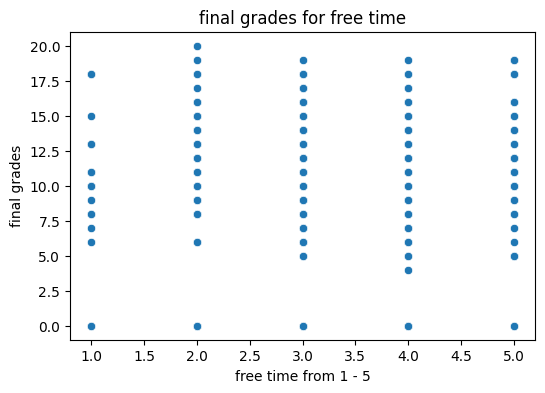


0.011307240308313017


In [10]:
#The tests for hypothesis 1

#We get all the values necessary to find the pearson coefficient and then calculate it
mean_abs = np.mean(df['absences'])
mean_gra = np.mean(df['G3'])
num = np.sum((df['absences'] - mean_abs) * (df['G3'] - mean_gra))
std_abs = np.std(df['absences'])
std_gra = np.std(df['G3'])
den = len(df) * std_abs * std_gra
corr = num / den
print(corr)
print()

#The tests for hypothesis 2

#box plot since we don't have a visual representation for this
plt.figure(figsize=(6, 4))
sns.scatterplot(x='freetime', y='G3', data=df)
plt.title('final grades for free time')
plt.xlabel('free time from 1 - 5')
plt.ylabel('final grades')
plt.show()
print()

#This is the same test as we did for hypothesis 2
mean_fret = np.mean(df['freetime'])
mean_gra2 = np.mean(df['G3'])
num2 = np.sum((df['freetime'] - mean_fret) * (df['G3'] - mean_gra2))
std_fret = np.std(df['freetime'])
std_gra2 = np.std(df['G3'])
den2 = len(df) * std_fret * std_gra2
corr2 = num2 / den2
print(corr2)

Findings for hypothesis 1: The findings for hypothesis one are that the pearson coefficient is around 0.034. This scatterplot, however, shows that the more absences someone has the further away they will be from a maximum grade. This suggests that there is a positive correlation between grades and absences. This goes against my initial hypothesis since I believed that the more absences a student would have the worse grades they would have in the end. Albeit, the coefficient isn't very high so it doesn't suggest a strong correlation.

Findings for hypothesis 2: The findings for this hypothesis are that the pearson coefficient is aroind 0.011. Additionally, the scatterplot suggests that at around a value of 2 for free time is where we see the highest final grade average. Our coefficient suggests a positive relationship between free time and havinga higher grade, this does match our original hypothesis. Although, once again the correlation isn't very so it doesn't indicate a very strong relationship.